# Data Analysis Project - Breast Cancer Wisconsin (Original) DataSet (https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

### Firstly, I load the data set and create the data frame

In [3]:
breast_cancer_df = pd.read_csv("breast-cancer-wisconsin.data", 
                                 names=["ID", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape",
                                        "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei",
                                        "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Target"], 
                                 na_values="?")
breast_cancer_df.head()

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Target
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


### I prepare the data frame for later analysis - handle NaN values, drop redundant column, change target values to binary

In [5]:
breast_cancer_df.drop('ID', axis=1, inplace=True)

In [11]:
breast_cancer_df.isna().sum() #Checking NaN values - 16 in Bare_Nuclei column
breast_cancer_df["Bare_Nuclei"] = SimpleImputer(strategy="median").fit_transform(breast_cancer_df[["Bare_Nuclei"]])
breast_cancer_df.isna().sum() #Checking NaN values after imputing

Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Target                         0
dtype: int64

In [10]:
breast_cancer_df['Target'] = breast_cancer_df['Target'].map({2: 0, 4: 1})
breast_cancer_df.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


### I plot the count of benign and malignant cases

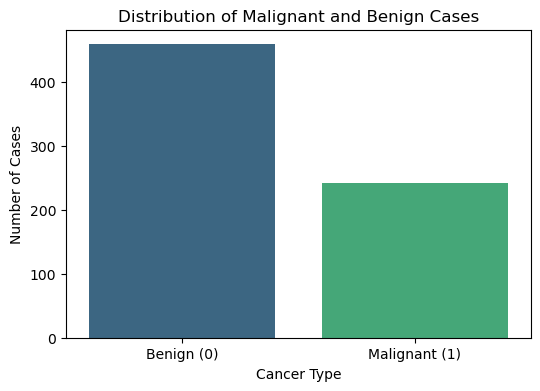

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(data=breast_cancer_df, x='Target', hue='Target', palette='viridis', legend=False)

plt.xlabel('Cancer Type')
plt.ylabel('Number of Cases')
plt.title('Distribution of Malignant and Benign Cases')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])

plt.show()

### When the data is ready, I split it into training and testing sets (80% train and 20% test)

In [14]:
x = breast_cancer_df.drop("Target", axis=1)
y = breast_cancer_df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### I standardize the features

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### I initialize classifiers - I chose these specific classifiers basing on sci-kit learn algorithm cheat sheet (https://scikit-learn.org/stable/machine_learning_map.html)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)  
svc_linear = LinearSVC(random_state=42, dual=False)
svc = SVC(random_state=42)
rfc = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

### I train the classifiers

In [20]:
knn.fit(x_train_scaled, y_train)
svc_linear.fit(x_train_scaled, y_train)
svc.fit(x_train_scaled, y_train)
rfc.fit(x_train_scaled, y_train)
ada.fit(x_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

### I make predictions

In [22]:
y_pred_knn = knn.predict(x_test_scaled)
y_pred_svc_linear = svc_linear.predict(x_test_scaled)
y_pred_svc = svc.predict(x_test_scaled)
y_pred_rfc = rfc.predict(x_test_scaled)
y_pred_ada = ada.predict(x_test_scaled)

### I evaluate all of the models

In [27]:
# K-NN model
print("K-NN Classifier Results:")
print("Accuracy on test data:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (K-NN):\n", classification_report(y_test, y_pred_knn))

# LinearSVC model
print("\nLinearSVC Results:")
print("Accuracy on test data:", accuracy_score(y_test, y_pred_svc_linear))
print("\nClassification Report (LinearSVC):\n", classification_report(y_test, y_pred_svc_linear))

# SVC model
print("\nSVC Classifier Results:")
print("Accuracy on test data:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report (SVC):\n", classification_report(y_test, y_pred_svc))

# Random Forest model
print("\nRandomForest Classifier Results:")
print("Accuracy on test data:", accuracy_score(y_test, y_pred_rfc))
print("\nClassification Report (RandomForest):\n", classification_report(y_test, y_pred_rfc))

# AdaBoost model
print("\nAdaBoost Classifier Results:")
print("Accuracy on test data:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report (AdaBoost):\n", classification_report(y_test, y_pred_ada))

K-NN Classifier Results:
Accuracy on test data: 0.9714285714285714

Classification Report (K-NN):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140


LinearSVC Results:
Accuracy on test data: 0.9642857142857143

Classification Report (LinearSVC):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140


SVC Classifier Results:
Accuracy on test data: 0.9785714285714285

Classification Report (SVC):
               precision    recall  f1-score   supp

### I plot the accuracies

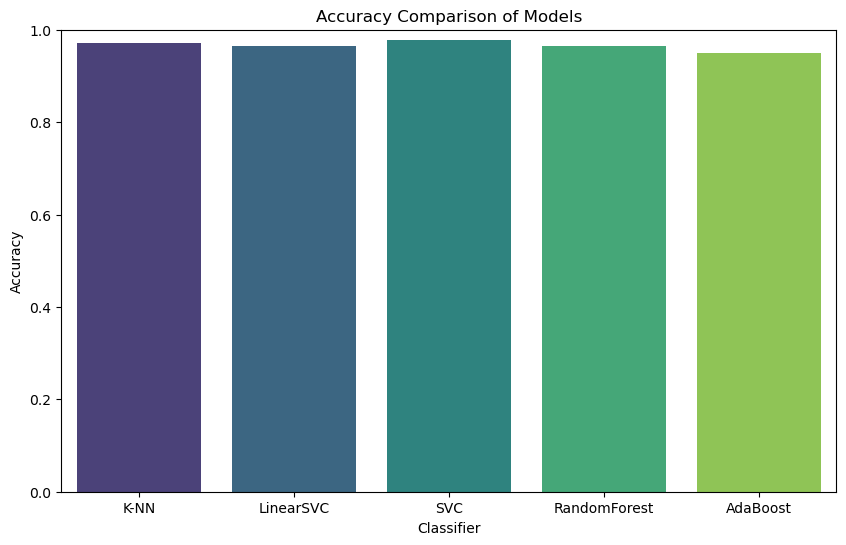

In [59]:
accuracies = {
    "K-NN": accuracy_score(y_test, y_pred_knn),
    "LinearSVC": accuracy_score(y_test, y_pred_svc_linear),
    "SVC": accuracy_score(y_test, y_pred_svc),
    "RandomForest": accuracy_score(y_test, y_pred_rfc),
    "AdaBoost": accuracy_score(y_test, y_pred_ada)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.keys()), palette='viridis', legend=False)

plt.title('Accuracy Comparison of Models')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.show()

### I plot the confusion matrix for each model

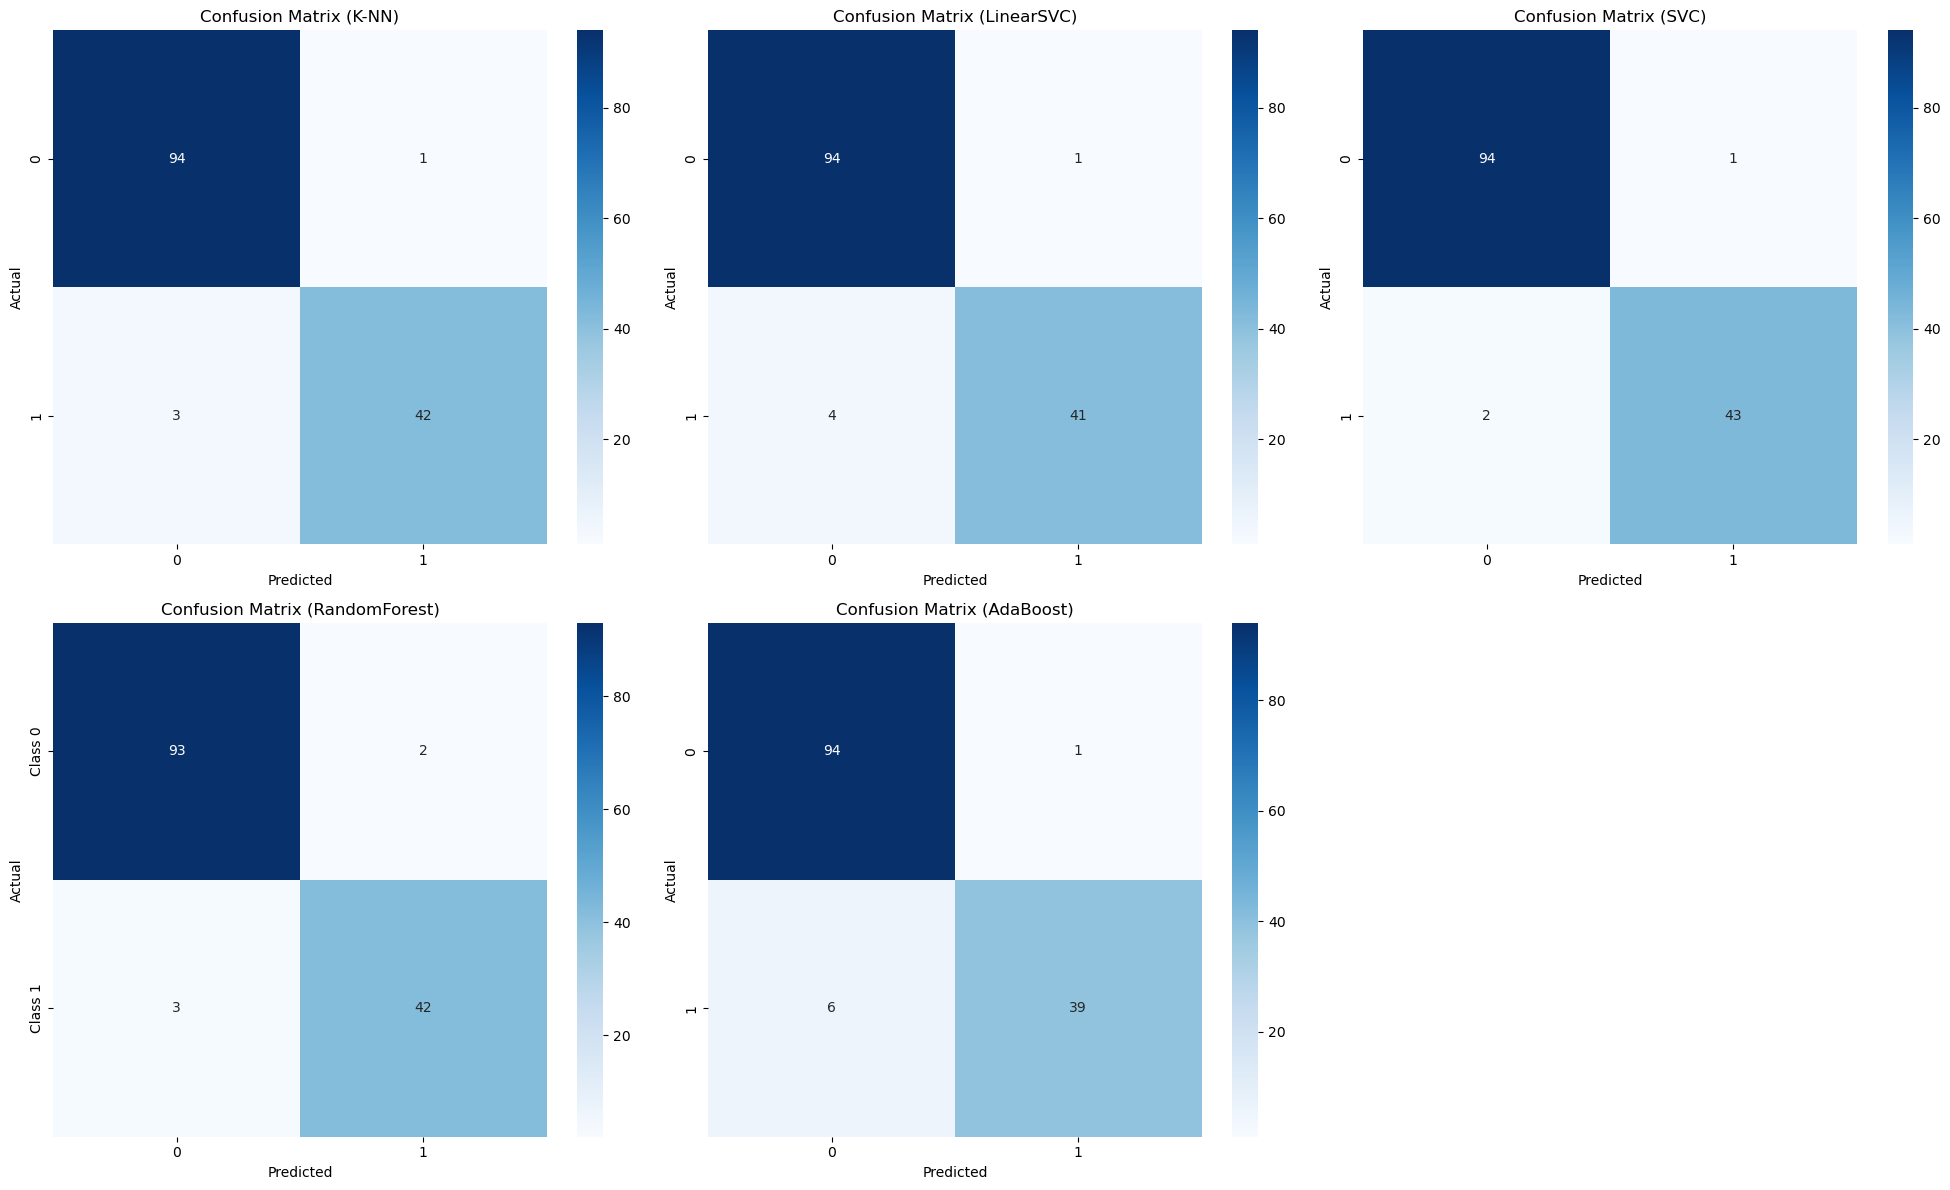

In [42]:
# Confusion Matrix for each model
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svc_linear = confusion_matrix(y_test, y_pred_svc_linear)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Plot confusion matrix for all models
plt.figure(figsize=(20, 12))

# Plot K-NN confusion matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (K-NN)")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot LinearSVC confusion matrix
plt.subplot(2, 3, 2)
sns.heatmap(cm_svc_linear, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (LinearSVC)")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot SVC confusion matrix
plt.subplot(2, 3, 3)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (SVC)")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot Random Forest confusion matrix
plt.subplot(2, 3, 4)
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (RandomForest)")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot AdaBoost confusion matrix
plt.subplot(2, 3, 5)
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (AdaBoost)")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

### I plot the ROC curve and AUC

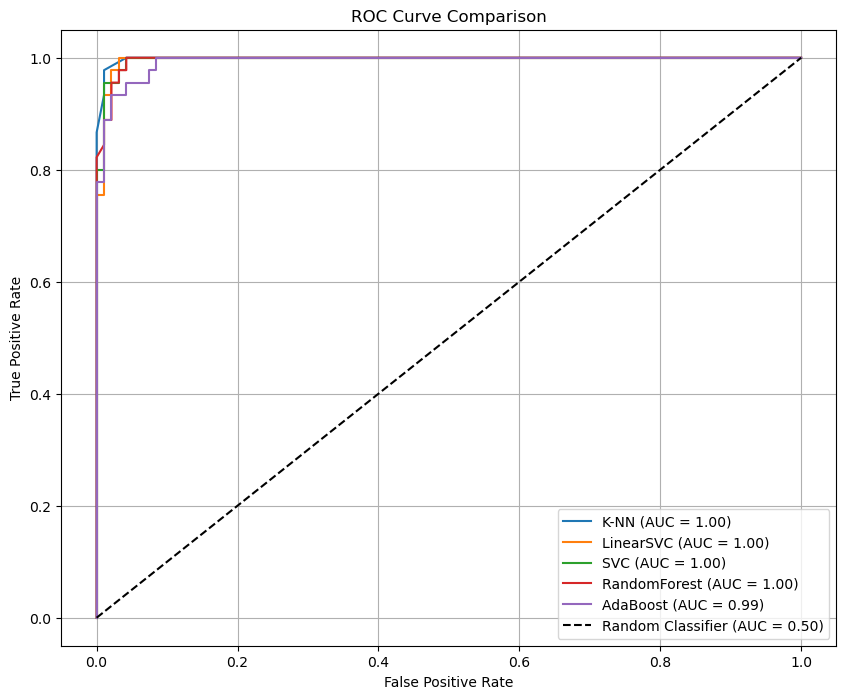

In [60]:
plt.figure(figsize=(10, 8))

classifiers = {
    "K-NN": knn,
    "LinearSVC": svc_linear,
    "SVC": svc,
    "RandomForest": rfc,
    "AdaBoost": ada
}

for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(x_test_scaled)[:, 1]  # Probability for the positive class
    else:
        y_pred_prob = clf.decision_function(x_test_scaled)  # For classifiers like SVC
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

### I plot the correlation heat map

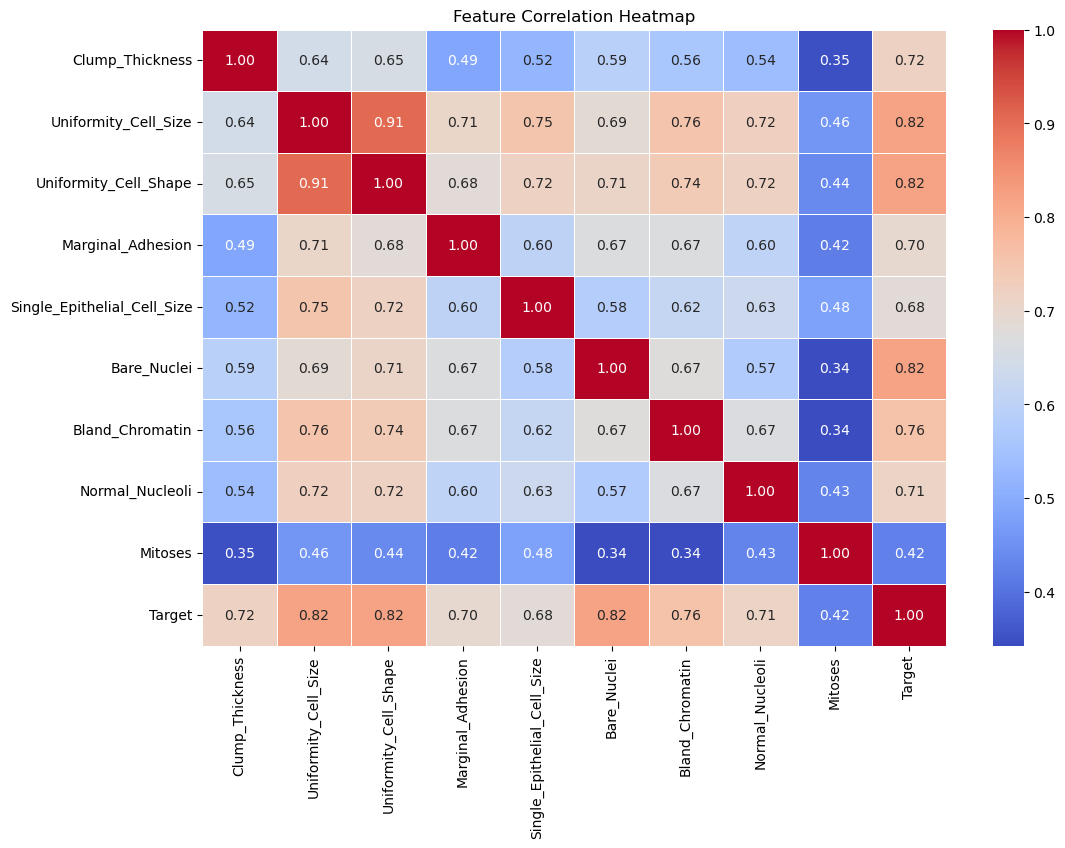

In [44]:
correlation_matrix = breast_cancer_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")

plt.show()

### I plot feature importance for Random Forest Classifier

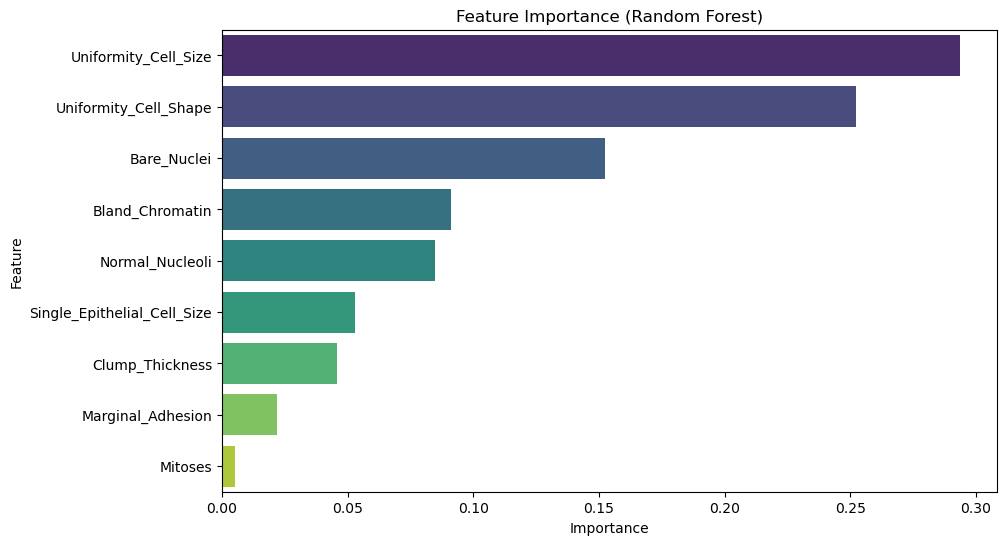

In [58]:
importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,  
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue = 'Feature', data=feature_importance_df, palette='viridis', legend=False)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()